## Basic Libraries

In [715]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file = '/Users/akshatg/Desktop/CS Folder/Code/Machine Learning/Coursework/default of credit card clients.xls'
df = pd.read_excel(file)

## Dataset

#### Data Cleaning

1. General Checking

In [716]:
print(df.head(10))
print(df.describe())

  Unnamed: 0         X1   X2         X3        X4   X5     X6     X7     X8  \
0         ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3   
1          1      20000    2          2         1   24      2      2     -1   
2          2     120000    2          2         2   26     -1      2      0   
3          3      90000    2          2         2   34      0      0      0   
4          4      50000    2          2         1   37      0      0      0   
5          5      50000    1          2         1   57     -1      0     -1   
6          6      50000    1          1         2   37      0      0      0   
7          7     500000    1          1         2   29      0      0      0   
8          8     100000    2          2         2   23      0     -1     -1   
9          9     140000    2          3         1   28      0      0      2   

      X9  ...        X15        X16        X17       X18       X19       X20  \
0  PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PA

- The Headers are incorrectly shifted
- The column name 'PAY_0' should be 'PAY_1'
- The column name 'default payment next month' is changed to 'DEFAULT'

In [717]:
df = pd.read_excel(file,header=1)
df.rename(columns={'PAY_0': 'PAY_1', 'default payment next month':'DEFAULT' }, inplace=True)
print(df.head(10))


   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   
5   6      50000    1          1         2   37      0      0      0      0   
6   7     500000    1          1         2   29      0      0      0      0   
7   8     100000    2          2         2   23      0     -1     -1      0   
8   9     140000    2          3         1   28      0      0      2      0   
9  10      20000    1          3         2   35     -2     -2     -2     -2   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       6

2. Looking at value counts for nominal(categorical) features
3. Check for any null values

In [718]:
print(df['SEX'].value_counts())
print(df['EDUCATION'].value_counts())
print(df['MARRIAGE'].value_counts())
print(df['DEFAULT'].value_counts())

print(df.isnull().sum())

SEX
2    18112
1    11888
Name: count, dtype: int64
EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64
MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64
DEFAULT
0    23364
1     6636
Name: count, dtype: int64
ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64


- SEX Column looks fine
- EDUCATION Column has inputs such as 0, 5, and 6 which could be inputting issues and so I think these can be dropped
- MARRIAGE Column has 0 inputs, which could be inputting issues and I think these again can be dropped
- DEFAULT Column looks fine
- No null values so that does not need to be addressed

I would be removing a max of (54 + 14 + 51 + 280)/30000 * 100 = 1.33% (Assuming none of the instances are overlapping) and so since these entries make up a very small amount of instances, I can safely remove these instances

In [719]:
df = df.drop(df[df['MARRIAGE']==0].index)
df = df.drop(df[df['EDUCATION']==0].index)
df = df.drop(df[df['EDUCATION']==5].index)
df = df.drop(df[df['EDUCATION']==6].index)

4. The PAY_N columns are also nominal(Categrical) features and so these also need to be checked

In [720]:
print(df['PAY_1'].value_counts())
print(df['PAY_2'].value_counts())
print(df['PAY_3'].value_counts())
print(df['PAY_4'].value_counts())
print(df['PAY_5'].value_counts())
print(df['PAY_6'].value_counts())

PAY_1
 0    14499
-1     5633
 1     3662
-2     2708
 2     2640
 3      320
 4       76
 5       24
 8       19
 6       11
 7        9
Name: count, dtype: int64
PAY_2
 0    15476
-1     5990
 2     3904
-2     3722
 3      326
 4       97
 1       28
 5       25
 7       20
 6       12
 8        1
Name: count, dtype: int64
PAY_3
 0    15518
-1     5863
-2     4027
 2     3802
 3      237
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: count, dtype: int64
PAY_4
 0    16204
-1     5617
-2     4287
 2     3142
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: count, dtype: int64
PAY_5
 0    16684
-1     5480
-2     4479
 2     2617
 3      177
 4       84
 7       58
 5       17
 6        4
 8        1
Name: count, dtype: int64
PAY_6
 0    16053
-1     5674
-2     4806
 2     2756
 3      183
 4       49
 7       46
 6       19
 5       13
 8        2
Name: count, dtype: int64


- I can notice that there are inputs such as -2 and 0 that are not defined in the description of the dataset so, since these most probably mean 'pay duly' which is defined by the output of -1, I can convert all instances of -2, -1, 0 to -1

In [721]:
PAY = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for feature in PAY:
    df.loc[df[feature].isin([-2,-1,0]), feature] = -1

5. Look at a column from BILL_AMTn and PAY_AMTn

In [722]:
print(df[['BILL_AMT1','PAY_AMT1']].describe())

           BILL_AMT1       PAY_AMT1
count   29601.000000   29601.000000
mean    50957.432012    5649.560319
std     73370.242404   16568.264941
min   -165580.000000       0.000000
25%      3528.000000    1000.000000
50%     22259.000000    2100.000000
75%     66623.000000    5005.000000
max    964511.000000  873552.000000


- Everything looks alright, except for a potential for outliers but I will analyse this in Data Exploration

#### Data Exploration

What I want to do is summarise the main characterisitcs of the dataset and understand the dataset in depth

1. First lets look at the distribution of the target column, 'DEFAULT'

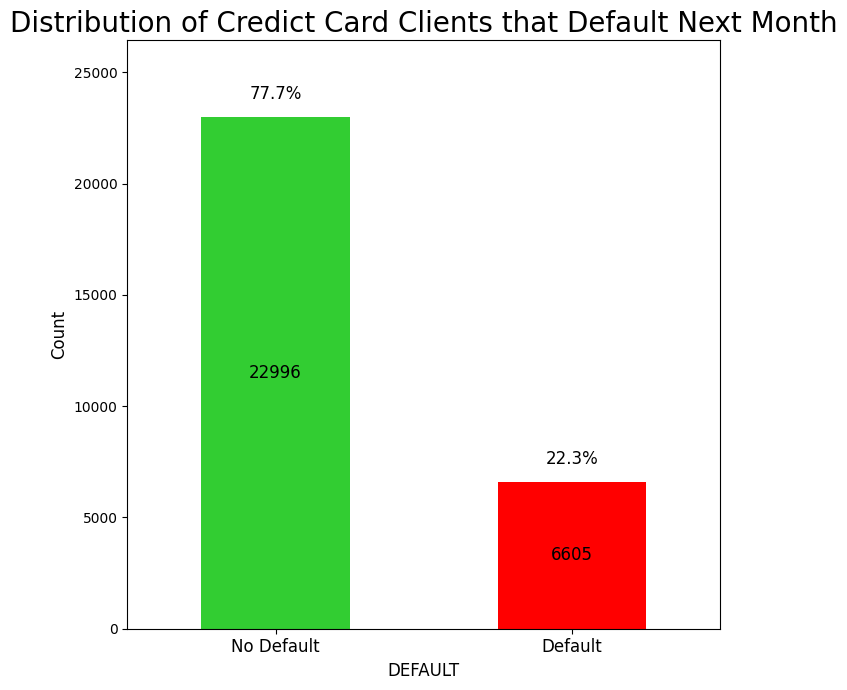

In [723]:
# Percentages calculation
count = df['DEFAULT'].value_counts()
total = count.sum()
percentages = (count/total) * 100

# Plotting
plt.figure(figsize=(7, 7))
default_graph = count.plot(kind='bar', color=['limegreen', 'red'])
plt.title('Distribution of Credict Card Clients that Default Next Month', fontsize=20)
plt.xlabel('DEFAULT', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No Default', 'Default'], rotation=0, fontsize=12)

plt.ylim(0, max(count) * 1.15)

for bar in default_graph.patches:
    bar_height = bar.get_height()
    default_graph.annotate(format(bar_height, '.0f'),
                      (bar.get_x() + bar.get_width() / 2, bar_height/2), 
                      ha='center', va='center', 
                      size=12)

    # Placing percentage above the bar
    default_graph.annotate(f'{percentages[bar.get_x()+bar.get_width()/2]:.1f}%',
                      (bar.get_x() + bar.get_width() / 2, bar_height), 
                      ha='center', va='bottom', 
                      size=12, xytext=(0, 10),
                      textcoords='offset points')

plt.tight_layout()
plt.show()



2. Graph that highlights whether there are outliers or not

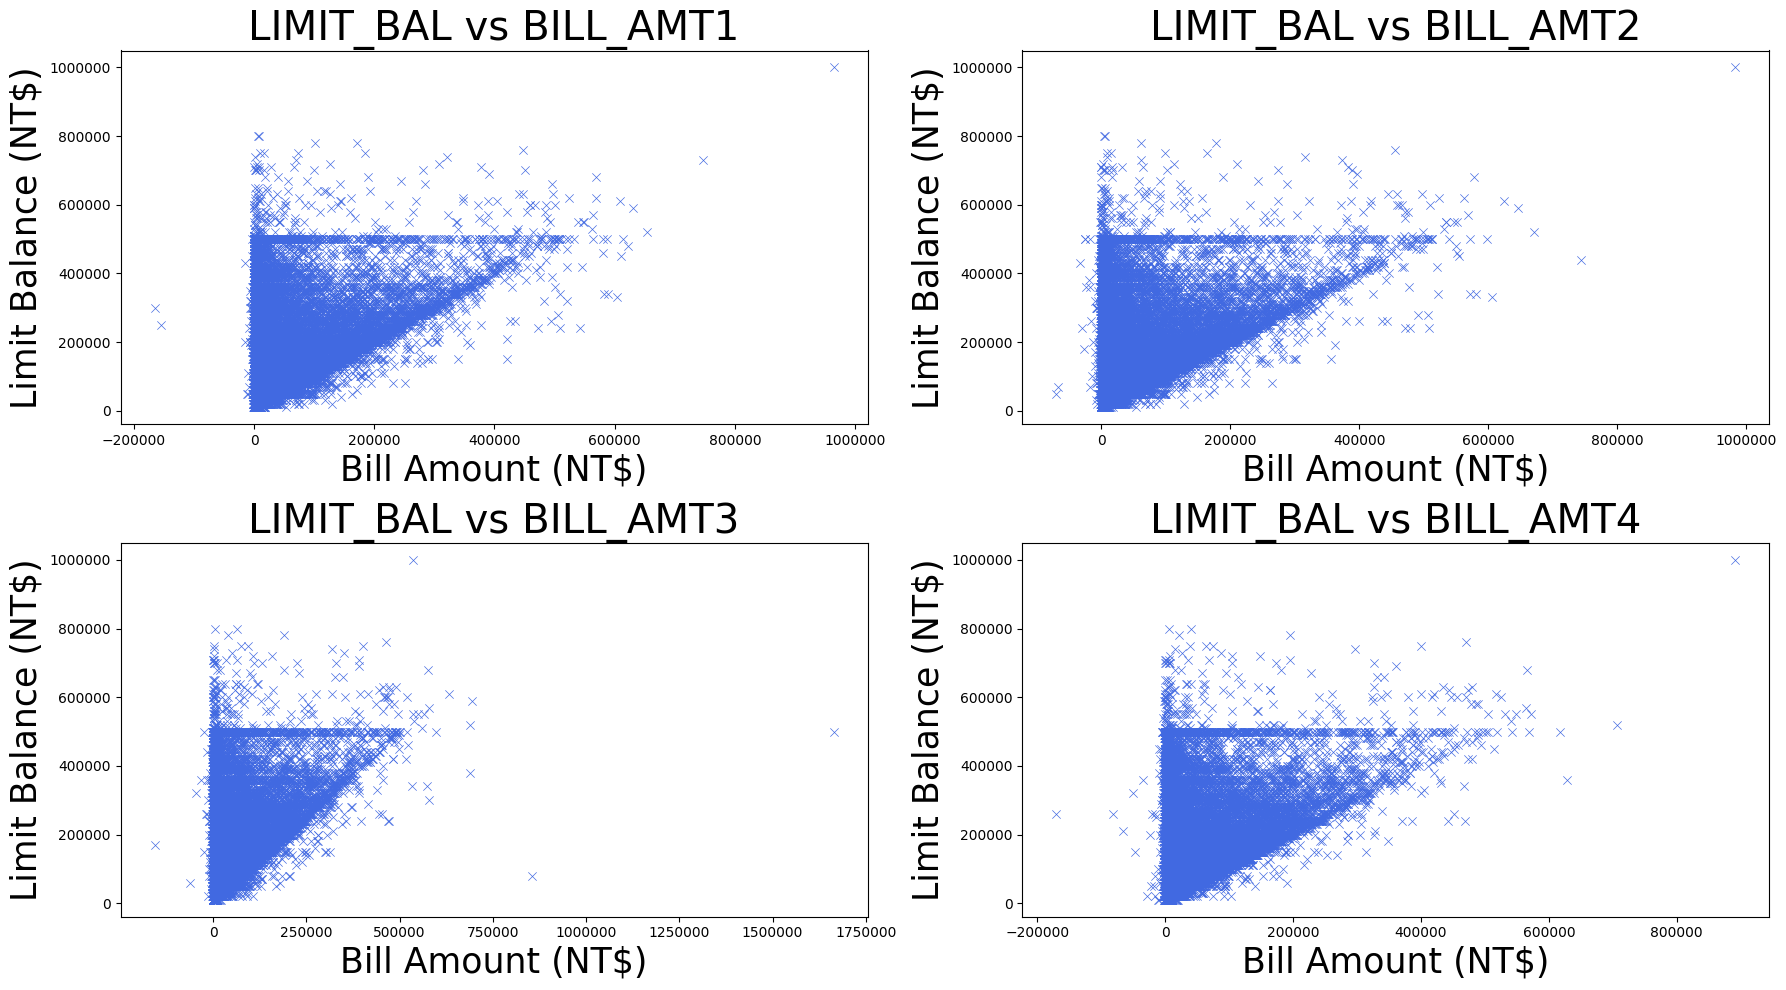

In [724]:
# Columns for BILL_AMTn (where n ranges from 1 to 6)
bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))

# Looping through each BILL_AMTn column and creating a scatter plot
for i, bill_amt in enumerate(bill_cols):
    row, col = divmod(i, 2)
    sns.scatterplot(x=bill_amt, y='LIMIT_BAL', data=df, ax=axes[row, col], marker='x', color='royalblue')
    axes[row, col].set_title(f'LIMIT_BAL vs {bill_amt}', fontsize=29)
    axes[row, col].set_xlabel('Bill Amount (NT$)',fontsize=25)
    axes[row, col].set_ylabel('Limit Balance (NT$)',fontsize=25)
    axes[row, col].ticklabel_format(style='plain', axis='both')

plt.tight_layout()
plt.show()

3. Distribution of nominal variables

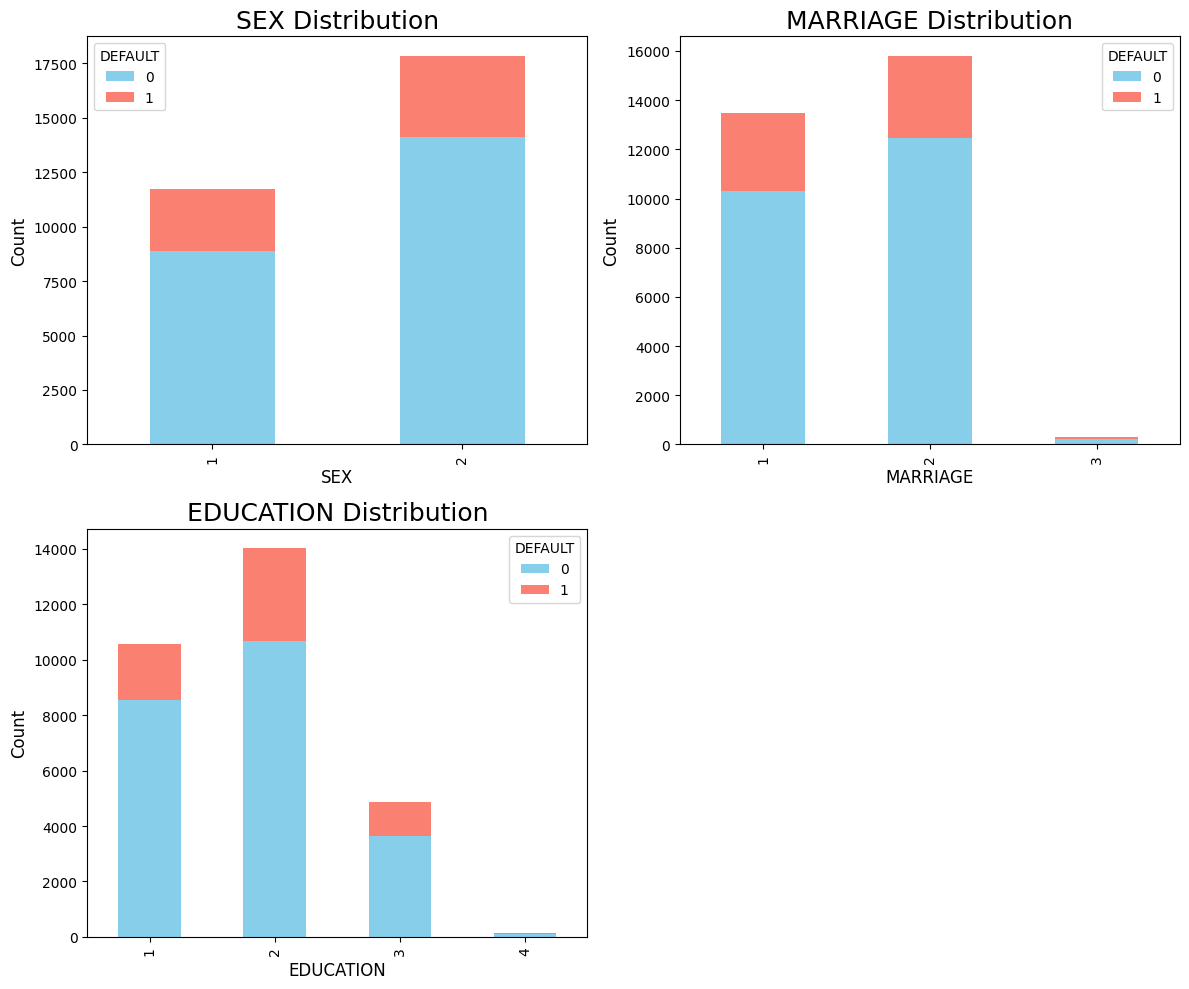

In [725]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))


cols = ['SEX', 'MARRIAGE', 'EDUCATION']
titles = ['SEX Distribution', 'MARRIAGE Distribution', 'EDUCATION Distribution']


for i, col in enumerate(cols):
    row = i // 2  
    col_index = i % 2  

    counts = df.groupby([col, 'DEFAULT']).size().unstack()

    counts.plot(kind='bar', stacked=True, ax=axes[row, col_index], color=['skyblue', 'salmon'])

    axes[row, col_index].set_title(titles[i], fontsize=18)
    axes[row, col_index].set_xlabel(col, fontsize=12)
    axes[row, col_index].set_ylabel('Count', fontsize=12)
    axes[row, col_index].ticklabel_format(style='plain', axis='y') 

# Hide bottom right graph
if len(cols) < 4:
    axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

4. Getting the percentages for each of the nominal distributions to use in the report

In [726]:
nominals = ['SEX', 'MARRIAGE', 'EDUCATION']
s = {}

for nominal in nominals:
    counts = df.groupby([nominal, 'DEFAULT']).size().unstack(fill_value=0)
    percentages = counts.apply(lambda x: 100 * x / x.sum(), axis=1)
    s[nominal] = {
        'Counts': counts,
        'Percentage of Defaults': percentages
    }

for variable, data in s.items():
    print(f"{variable}")
    print("Counts:\n", data['Counts'])
    print("Percentage of Defaults:\n", data['Percentage of Defaults'])
    print("\n")

SEX
Counts:
 DEFAULT      0     1
SEX                 
1         8885  2861
2        14111  3744
Percentage of Defaults:
 DEFAULT          0          1
SEX                          
1        75.642772  24.357228
2        79.031084  20.968916


MARRIAGE
Counts:
 DEFAULT       0     1
MARRIAGE             
1         10285  3192
2         12477  3329
3           234    84
Percentage of Defaults:
 DEFAULT           0          1
MARRIAGE                      
1         76.315204  23.684796
2         78.938378  21.061622
3         73.584906  26.415094


EDUCATION
Counts:
 DEFAULT        0     1
EDUCATION             
1           8545  2036
2          10695  3329
3           3640  1233
4            116     7
Percentage of Defaults:
 DEFAULT            0          1
EDUCATION                      
1          80.757962  19.242038
2          76.262122  23.737878
3          74.697312  25.302688
4          94.308943   5.691057




#### Data splitting

In [727]:
from sklearn.model_selection import train_test_split

In [728]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Stats to create a table in the report
print("Training:")
print(f"Total count of instances: {len(y_train)}")
print(f"Count of defaulters: {y_train.sum()}")
print(f"Count of non-defaulters: {len(y_train) - y_train.sum()}")
perc_tr = (y_train.sum() / len(y_train)) * 100
print(f"Percentage of instances that default: {perc_tr:.2f}%\n")


print("Test")
print(f"Total count of instances: {len(y_test)}")
print(f"Count of defaulters: {y_test.sum()}")
print(f"Count of non-defaulters: {len(y_test) - y_test.sum()}")
perc_te = (y_test.sum() / len(y_test)) * 100
print(f"Percentage of instances that default: {perc_te:.2f}%\n")

Training:
Total count of instances: 23680
Count of defaulters: 5284
Count of non-defaulters: 18396
Percentage of instances that default: 22.31%

Test
Total count of instances: 5921
Count of defaulters: 1321
Count of non-defaulters: 4600
Percentage of instances that default: 22.31%



#### Data Preprocessing

1. One-Hot Encoding

In [729]:

from sklearn.preprocessing import OneHotEncoder

nominals = ['SEX', 'MARRIAGE', 'EDUCATION']
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(X_train[nominals])

# Transformations
X_train_encoded = encoder.transform(X_train[nominals])
X_test_encoded = encoder.transform(X_test[nominals])

new = []
for col, categories in zip(nominals, encoder.categories_):
    for category in categories:
        if col == 'SEX':
            name = 'MALE' if category == 1 else 'FEMALE'
        elif col == 'MARRIAGE':
            if category == 1:
                name = 'MARRIED'
            elif category == 2:
                name = 'SINGLE'
            else:
                name = 'OTHERS'
        elif col == 'EDUCATION':
            if category == 1:
                name = 'GRADUATE_SCHOOL'
            elif category == 2:
                name = 'UNIVERSITY'
            elif category == 3:
                name = 'HIGH_SCHOOL'
            else:
                name = 'OTHERS'
        new.append(name)

# Convert encoded features
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=new, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=new, index=X_test.index)

# Drop original
X_train = X_train.drop(nominals, axis=1)
X_test = X_test.drop(nominals, axis=1)

# Concatenate
X_train = pd.concat([X_train, X_train_encoded_df], axis=1)
X_test = pd.concat([X_test, X_test_encoded_df], axis=1)

# Verification
print(X_train.sample(10))

          ID  LIMIT_BAL  AGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  \
13128  13129     240000   39     -1     -1     -1     -1     -1     -1   
14211  14212     190000   39     -1     -1     -1     -1      2     -1   
17148  17149      50000   27      1      2      2      2      2      2   
29462  29463     150000   27     -1     -1     -1     -1     -1     -1   
8827    8828     140000   61     -1     -1     -1     -1     -1     -1   
21832  21833      70000   27     -1     -1     -1     -1     -1     -1   
25321  25322      80000   25     -1     -1     -1     -1     -1     -1   
19610  19611     240000   47     -1     -1     -1     -1     -1     -1   
7961    7962      20000   25      4      5      4      3      2     -1   
6654    6655     190000   26      2     -1     -1     -1     -1     -1   

       BILL_AMT1  ...  PAY_AMT6  MALE  FEMALE  MARRIED  SINGLE  OTHERS  \
13128     236229  ...     25043   1.0     0.0      1.0     0.0     0.0   
14211      70396  ...      9000   0.0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


2. MinMaxScalar

In [730]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()

X_train_minmax = pd.DataFrame(mm_scaler.fit_transform(X_train), columns=X_train.columns)
X_test_minmax = pd.DataFrame(mm_scaler.transform(X_test), columns=X_test.columns)

print(X_train_minmax.describe())

                 ID     LIMIT_BAL           AGE         PAY_1         PAY_2  \
count  23680.000000  23680.000000  23680.000000  23680.000000  23680.000000   
mean       0.498504      0.159389      0.248869      0.065517      0.052599   
std        0.288164      0.131213      0.158789      0.127831      0.128242   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.249550      0.040404      0.120690      0.000000      0.000000   
50%        0.497733      0.131313      0.224138      0.000000      0.000000   
75%        0.747700      0.232323      0.344828      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

              PAY_3         PAY_4         PAY_5         PAY_6     BILL_AMT1  \
count  23680.000000  23680.000000  23680.000000  23680.000000  23680.000000   
mean       0.049165      0.041479      0.035384      0.036810      0.184366   
std        0.124948      0.118379      0.110967    

3. PCA (Dimensionality Reduction)

In [731]:
from sklearn.decomposition import PCA

pca_full = PCA(n_components=15)
pca_full.fit(X_train_minmax)
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

explained_variance_df = pd.DataFrame({
    'Component': np.arange(1, 16),
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Explained Variance': cumulative_explained_variance
})

# Print 15
print(explained_variance_df.head(15))

pca = PCA(n_components=11)
X_train_pca = pca.fit_transform(X_train_minmax)
X_test_pca = pca.transform(X_test_minmax)

    Component  Explained Variance Ratio  Cumulative Explained Variance
0           1                  0.286898                       0.286898
1           2                  0.257574                       0.544472
2           3                  0.213012                       0.757484
3           4                  0.107629                       0.865114
4           5                  0.045032                       0.910146
5           6                  0.029533                       0.939679
6           7                  0.012583                       0.952263
7           8                  0.009938                       0.962200
8           9                  0.008035                       0.970235
9          10                  0.007389                       0.977624
10         11                  0.005648                       0.983272
11         12                  0.004155                       0.987427
12         13                  0.003089                       0.990516
13    

## Model Training

#### Logistic Regression

1. Checking the scores of Logistic Regression before hyperparameter tuning

In [732]:
from sklearn.linear_model import LogisticRegression

logistic_r = LogisticRegression()
logistic_r.fit(X_train, y_train)
y_pred = logistic_r.predict(X_test)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


2. Evaluation Metrics model

In [733]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

acc = accuracy_score(y_test, y_pred)
preci = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Classification report for original data
report = classification_report(y_test, y_pred)

print("Original:")
print("Accuracy:", acc)
print("Precision:", preci)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:\n", report)


Original:
Accuracy: 0.7768957946292856
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.87      4600
           1       0.00      0.00      0.00      1321

    accuracy                           0.78      5921
   macro avg       0.39      0.50      0.44      5921
weighted avg       0.60      0.78      0.68      5921



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

3. Hyperparameter tuning
    - Using PCA
    - Checking for underfitting/overfitting

[0.80785473 0.80405405 0.79581926 0.80152027 0.80637669]


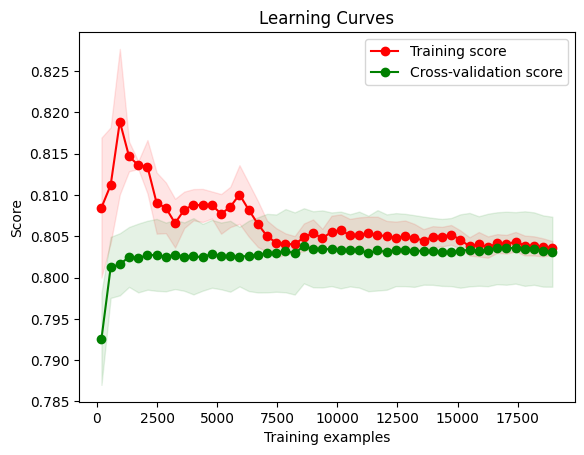

Mean cross-validation score: 0.803125


In [734]:
from sklearn.model_selection import cross_val_score, learning_curve

# Train the model using the PCA data
logistic_r_pca = LogisticRegression()
logistic_r_pca.fit(X_train_pca, y_train)
y_pred_pca = logistic_r_pca.predict(X_test_pca)


# K-fold for overfitting
cv_scores = cross_val_score(logistic_r_pca, X_train_pca, y_train, cv=5)
print(cv_scores)

train_sizes, train_scores, validation_scores = learning_curve(
    estimator=logistic_r_pca,
    X=X_train_pca,
    y=y_train,
    train_sizes=np.linspace(0.01, 1.0, 50),
    cv=5,
    scoring='accuracy'
)

train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title('Learning Curves')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.show()
print('Mean cross-validation score:', np.mean(cv_scores))

4. Use GridSearchCV to find optimal hyperparameters

In [735]:
from sklearn.model_selection import GridSearchCV

# Hyperparameters to be tested by gridsearchcv
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter' : [500,1000]
}


loggistic_r = LogisticRegression()

grid_search = GridSearchCV(loggistic_r, param_grid, cv=5, scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Hyperparameter:", best_params)
print("Accuracy:", best_score)


Hyperparameter: {'C': 100, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.8035472972972973


5. Train based on the new found hyperparameters

In [736]:
# Use best param
logistic_hyper = LogisticRegression(
    C=best_params['C'],
    penalty=best_params['penalty'],
    solver=best_params['solver'],
    max_iter=best_params['max_iter']
)

logistic_hyper.fit(X_train_pca, y_train)

y_pred_hyper = logistic_hyper.predict(X_test_pca)

accuracy_best = accuracy_score(y_test, y_pred_hyper)
precision_best = precision_score(y_test, y_pred_hyper)
recall_best = recall_score(y_test, y_pred_hyper)
f1_best = f1_score(y_test, y_pred_hyper)

# Classification report
report_best = classification_report(y_test, y_pred_hyper)

# Print out the metrics for the model after hyperparameter tuning
print("Metrics after hyperparameter tuning:")
print("Accuracy:", accuracy_best)
print("Precision:", precision_best)
print("Recall:", recall_best)
print("F1 Score:", f1_best)
print("Classification Report:\n", report_best)

Metrics after hyperparameter tuning:
Accuracy: 0.8094916399256882
Precision: 0.6595041322314049
Recall: 0.3020439061317184
F1 Score: 0.4143302180685358
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      4600
           1       0.66      0.30      0.41      1321

    accuracy                           0.81      5921
   macro avg       0.74      0.63      0.65      5921
weighted avg       0.79      0.81      0.78      5921



6. Create a Confusion matrix

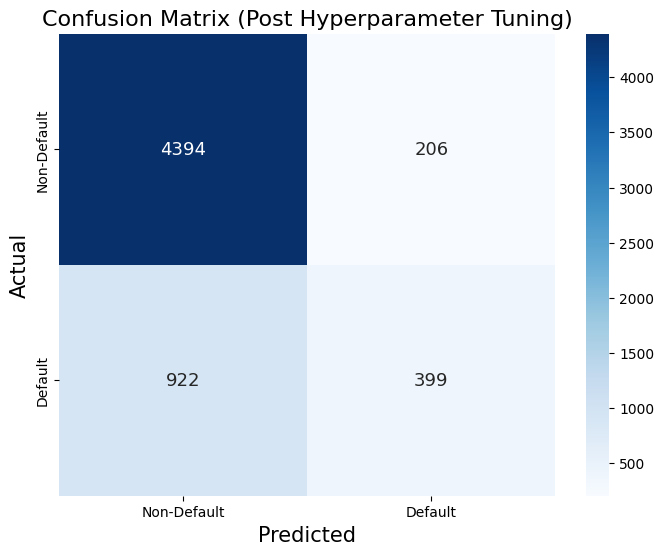

In [753]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_hyper)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Default', 'Default'], yticklabels=['Non-Default', 'Default'], annot_kws={"size": 13})
plt.title('Confusion Matrix (Post Hyperparameter Tuning)',fontsize=16)
plt.ylabel('Actual',fontsize=15)
plt.xlabel('Predicted',fontsize=15)
plt.show()

#### Random Forest

1. Train and test on the original data

In [739]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


In [740]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, zero_division=0)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("Classification Report:\n", report_rf)


Random Forest:
Accuracy: 0.8167539267015707
Precision: 0.6612021857923497
Recall: 0.3663890991672975
F1 Score: 0.47150511446663423
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4600
           1       0.66      0.37      0.47      1321

    accuracy                           0.82      5921
   macro avg       0.75      0.66      0.68      5921
weighted avg       0.80      0.82      0.80      5921



2. Also check on PCA data

In [741]:
rf_pca = RandomForestClassifier()

rf_pca.fit(X_train_pca, y_train)

y_pred_rf_pca = rf_pca.predict(X_test_pca)

accuracy_rf_pca = accuracy_score(y_test, y_pred_rf_pca)
precision_rf_pca = precision_score(y_test, y_pred_rf_pca, zero_division=0)
recall_rf_pca = recall_score(y_test, y_pred_rf_pca)
f1_rf_pca = f1_score(y_test, y_pred_rf_pca)

report_rf_pca = classification_report(y_test, y_pred_rf_pca)

print("Random Forest PCA:")
print("Accuracy:", accuracy_rf_pca)
print("Precision:", precision_rf_pca)
print("Recall:", recall_rf_pca)
print("F1 Score:", f1_rf_pca)
print("Classification Report:\n", report_rf_pca)

Random Forest PCA:
Accuracy: 0.8052693801722682
Precision: 0.6088082901554405
Recall: 0.3557910673732021
F1 Score: 0.44911610129001434
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      4600
           1       0.61      0.36      0.45      1321

    accuracy                           0.81      5921
   macro avg       0.72      0.65      0.67      5921
weighted avg       0.78      0.81      0.79      5921



3. Do some checking for over and underfitting

In [742]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(oob_score=True)

rf.fit(X_train_pca, y_train)

oob_error = 1 - rf.oob_score_

# Cross-validation
cv_scores = cross_val_score(rf, X_train_pca, y_train, cv=5)

print("OOB:", oob_error)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

OOB: 0.1983530405405406
Cross-validation scores: [0.80447635 0.80088682 0.80088682 0.80130912 0.80616554]
Mean cross-validation score: 0.8027449324324325


In [ ]:

param_grid = {
    'n_estimators': [100, 200, 300], 
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],    
}


rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, verbose=2)
grid_search.fit(X_train_pca, y_train)  
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best hyperparameters:", best_params)

In [743]:
rf_best = RandomForestClassifier(
    max_depth=10, 
    min_samples_leaf=4, 
    min_samples_split=5, 
    n_estimators=300
)

# Train the model using the original data
rf_best.fit(X_train_pca, y_train)

# Predict on the testing set for the original data
y_pred_rf_best = rf_best.predict(X_test_pca)

# Calculate metrics for the original data
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
precision_rf_best = precision_score(y_test, y_pred_rf_best, zero_division=0)
recall_rf_best = recall_score(y_test, y_pred_rf_best)
f1_rf_best = f1_score(y_test, y_pred_rf_best)

# Generate a classification report for the original data
report_rf_best = classification_report(y_test, y_pred_rf_best)

# Print the metrics
print("Random Forest metrics with optimized hyperparameters:")
print("Accuracy:", accuracy_rf_best)
print("Precision:", precision_rf_best)
print("Recall:", recall_rf_best)
print("F1 Score:", f1_rf_best)
print("Classification Report:\n", report_rf_best)

Random Forest metrics with optimized hyperparameters:
Accuracy: 0.8182739402128019
Precision: 0.6613965744400527
Recall: 0.38001514004542014
F1 Score: 0.4826923076923077
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4600
           1       0.66      0.38      0.48      1321

    accuracy                           0.82      5921
   macro avg       0.75      0.66      0.69      5921
weighted avg       0.80      0.82      0.80      5921



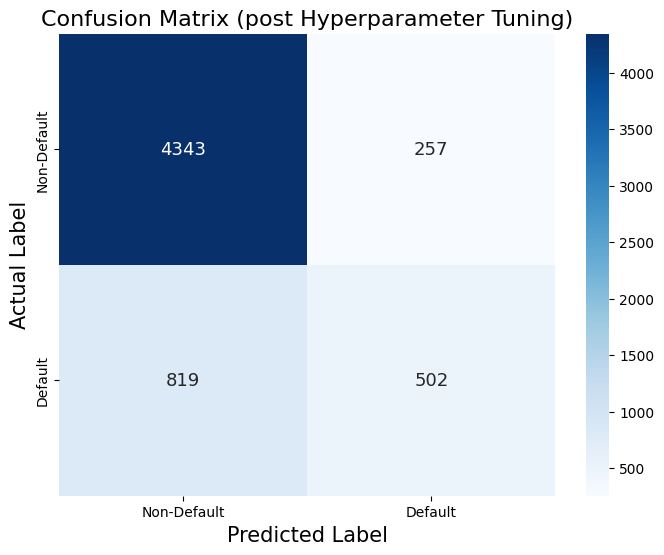

In [754]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf_best)

# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Default', 'Default'], yticklabels=['Non-Default', 'Default'], annot_kws={"size": 13})
plt.title('Confusion Matrix (post Hyperparameter Tuning)',fontsize=16)
plt.ylabel('Actual Label',fontsize=15)
plt.xlabel('Predicted Label',fontsize=15)
plt.show()

## Model Comparision

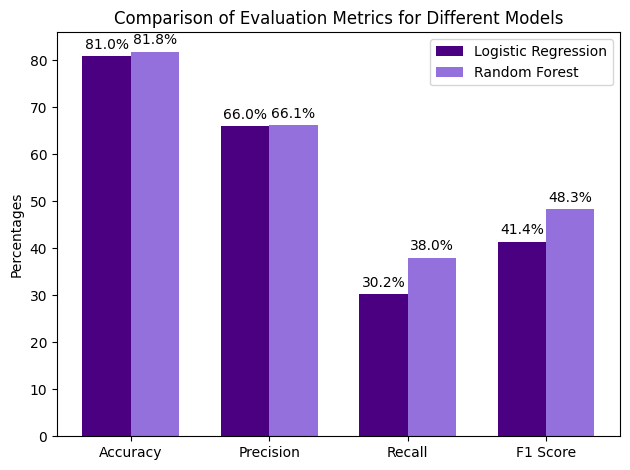

In [757]:

models = ['Logistic Regression', 'Random Forest']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
logistic_regression_scores = [0.8095, 0.6595, 0.3020, 0.4143]
random_forest_scores = [0.8183, 0.6614, 0.3800, 0.4827]

logistic_regression_scores = [x * 100 for x in logistic_regression_scores]
random_forest_scores = [x * 100 for x in random_forest_scores]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, logistic_regression_scores, width, label='Logistic Regression',color='indigo')
rects2 = ax.bar(x + width/2, random_forest_scores, width, label='Random Forest',color='mediumpurple')

ax.set_ylabel('Percentages')
ax.set_title('Comparison of Evaluation Metrics for Different Models')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.1f%%' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
